In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib.numpy_pickle as joblib
import torch
import torch.nn as nn
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import autoencoder_results_v2
import autoencoder_functions
import seperate_spec_and_features
import prediction_results
print(torch.__version__)

True
Using device: cuda
2.4.1


In [2]:
#load specs and features for both the shank3 and pups dataset

#### SHANK3
usvs_shank3 = joblib.load('shank3USVs_many_properties.jl')
features_shank3 = joblib.load('shank3USVs_hardcoded_features')
emitter_library_shank3 = joblib.load('emitter_library_shank3')
emitter_library_shank3_individual = joblib.load('emitter_library_shank3_individual')

#### PUPS
usvs_pups = joblib.load('emitter_and_specs.jl')
features_pups = joblib.load('pups_hardcoded_features')
emitter_library_pups_individual = joblib.load('emitter_library_pups_individual')

In [3]:
#seperate specs and emitter for both datasets

#### SHANK3
spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path= seperate_spec_and_features.separate_spec_and_features(usvs_shank3)
spec_shank3 = spec
emitter_shank3 = emitter

#### PUPS
spec, emitter = seperate_spec_and_features.seperate_spec_and_emitter_pups(usvs_pups)
spec_pups = spec
emitter_pups = emitter

del spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path

In [4]:
### MAKE SURE SPEC AND EMITTERS AND FEATURES ARE ALL OF THE SAME SIZE
assert len(spec_shank3) == len(emitter_shank3) == len(features_shank3), "The lengths of the lists are not equal."
assert len(spec_pups) == len(emitter_pups) == len(features_pups), "The lengths of the lists are not equal."

In [5]:
#### give the folder in which the models are saved for making predictions

#### SHANK3 trained with labels 0 and 1 for WT
# path_to_model_shank3 = 'Shank3_24_final'
path_to_model_shank3 = 'final_models/Shank3_8_v0'

#### PUPS trained with label numbers for each individual emitter
path_to_model_pups = 'final_models/pups_8_v0'

#BELOW 4 PREDICTION FIGURES FOR THE SHANK3 DATASET WILL BE MADE: strain_prediction_model, strain_prediction_hardcoded, emitter_prediction_model and
# emitter_prediction_hardcoded

#THERE WILL ALSO BE 2 PREDICTION FIGURES FOR THE PUPS DATASET: emitter_prediction_model_pups and emitter_prediction_hardcoded_pups

# FOR ALL FIGURES FEMALE SPECTROGRAMS WILL BE REMOVED AND THERE WILL BE 6 SEPERATE FUNCTIONS FOR EACH FIGURE IN prediction_results.py

In [6]:
# prediction_results.from_voc_to_latent_vis(spec_pups, emitter_pups, emitter_library_pups_individual, path_to_model_pups, combine_train_test = True)

In [7]:
# prediction_results.from_voc_to_latent_vis(spec_shank3, emitter_shank3, emitter_library_shank3_individual, path_to_model_shank3, combine_train_test = True)

In [8]:
# prediction_results.from_voc_to_latent_vis(spec_shank3, emitter_shank3, emitter_library_shank3, path_to_model_shank3, combine_train_test = False, use_strain = True)

c:\Users\ruben\Documents\Internship\Thesis code\prediction_results.py:1613: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train = torch.load(path_to_model + '/s

indices before removal of doubles = 31202
indices after removal of doubles = 31202
The same labels are present in both labels_train and labels_test.
Total: 6687
Number of spectograms: 6687
True
random_index: 1762
28


c:\Users\ruben\Documents\Internship\Thesis code\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Thesis code\prediction_results.py:1742: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you star

[]
(6687, 15)
!!! Zero standard deviation detected in columns: [] !!!
(6687, 2)
[[ 3.099614  14.181038 ]
 [14.859227  11.291242 ]
 [ 2.1667635 12.816524 ]
 ...
 [ 9.449968   9.395452 ]
 [ 3.6627858 13.764849 ]
 [ 6.1464853 13.886904 ]]
-2.9656594 2.9354436
16.459656 15.10855


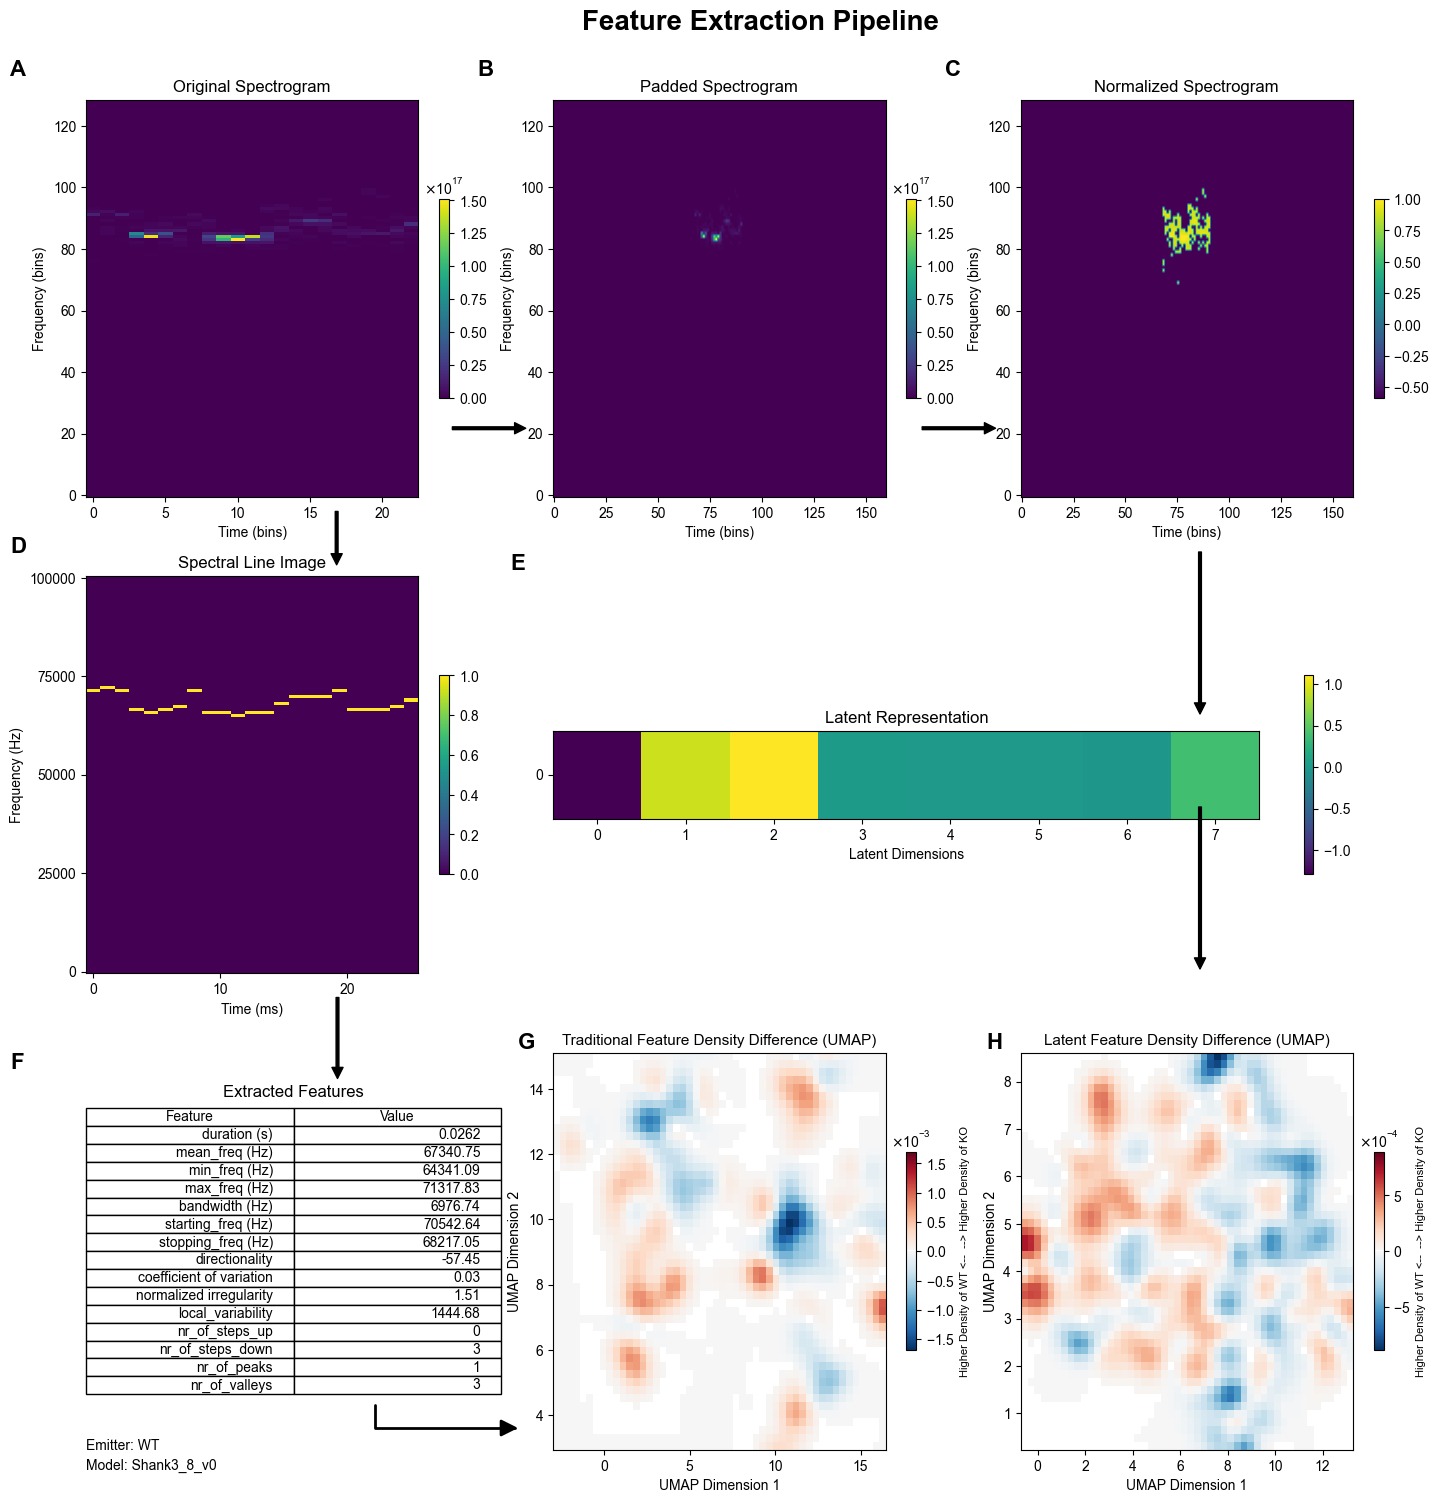

In [9]:
prediction_results.from_voc_to_latent_vis_strain(spec_shank3, emitter_shank3, emitter_library_shank3, path_to_model_shank3, combine_train_test = False)